## Tanzania-EDA

### Background

Tanzania is an East African country with about 59,678,000 in population (2021 est.), and located just south of the Equator. Despite their rapidly expanding tourism market and being high in agriculture cultivation, Tanzania is a developing country that still has struggles with providing clean water to its entire population. There are many water points already established in the country, but some are in great need of repair while others have failed altogether.

#### Data Information

We are using the Tanzanian Water Wells data set hosted by [DrivenData](https://www.drivendata.org/) and a part of the active competition [Pump it Up: Data Mining the Water Table](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/) . We were provided with 3 datasets in total with dates ranging from 1960- 2013.

This is a basic overview of each dataset:
Training set values: 59,400 observations, 40 variables
Test set: 14,850 observations, 40 variables
Training set labels: 59,400 observations; which contains our target variable which is 'status_group' which has the following well categories of 'Functional', 'Functional needs repair', and 'Nonfunctional'

The following cells gives more information on each column and the descriptions for each. 

In [1089]:
## First we will import all the packages needed for this journal
import pandas as pd

In [1090]:
df_desc = pd.read_csv("data/key.csv", index_col = 0)
y = pd.read_csv("data/Training data target.csv")
X= pd.read_csv("data/Training data.csv")

In [1091]:
df_desc

,Description
Key,
amount_tsh,Total static head (amount water available to w...
date_recorded,The date the row was entered
funder,Who funded the well
gps_height,Altitude of the well
installer,Organization that installed the well
longitude,GPS coordinate
latitude,GPS coordinate
wpt_name,Name of the waterpoint if there is one
basin,Geographic water basin


#### Beginning the EDA Process

First, we merged the two tables to get our target and predictor variables in the same DataFrame. We are just getting a feel for how many features we have, the type of features we have, and if we have any missing data at this point. 

In [1092]:
#Merging data to get a full picture
df = X.merge(y,on="id")

In [1124]:
df.groupby(["status_group"])["region_code"].value_counts()

status_group             region_code
functional               11             4143
                         17             2807
                         3              2640
                         12             2319
                         5              2147
                         2              1978
                         18             1729
                         10             1480
                         19             1468
                         4              1408
                         16             1363
                         6              1066
                         13             1011
                         1              1009
                         21              987
                         20              886
                         14              862
                         15              707
                         60              490
                         7               461
                         80              432
                  

In [1115]:
df["region_code"].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [1013]:
df.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [1014]:
df.drop("id",axis=1, inplace= True)

In [1015]:
df

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,5/3/2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,4700.0,5/7/2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,0.0,4/11/2011,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,0.0,3/8/2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [1016]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

As we can see, there are 39 predictor variables in our dataset, there are also some null values that will need to be addressed before we start our modeling process. There are quite a few categorical variables here and a few numerical columns that need to be handled seperately. 

#### EDA Graphs

Next, we will create count plots to see how each variable effects the status of the well. 

In [1018]:
import seaborn as sns #importing dependecies 

In [1019]:
df.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [1020]:
import matplotlib.pyplot as plt

In [1021]:
#Creating function to plot basic countplot for each column
def count_plot(col):
    plt.figure(figsize=(15,8))
    ax= sns.countplot(x=col, hue="status_group", data=df)

In [1022]:
df["payment"].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [1112]:
df["status_group"].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [1024]:
df["payment"].isna().sum()

0

In [1114]:
df["quantity"].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [1113]:
df["waterpoint_type"].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

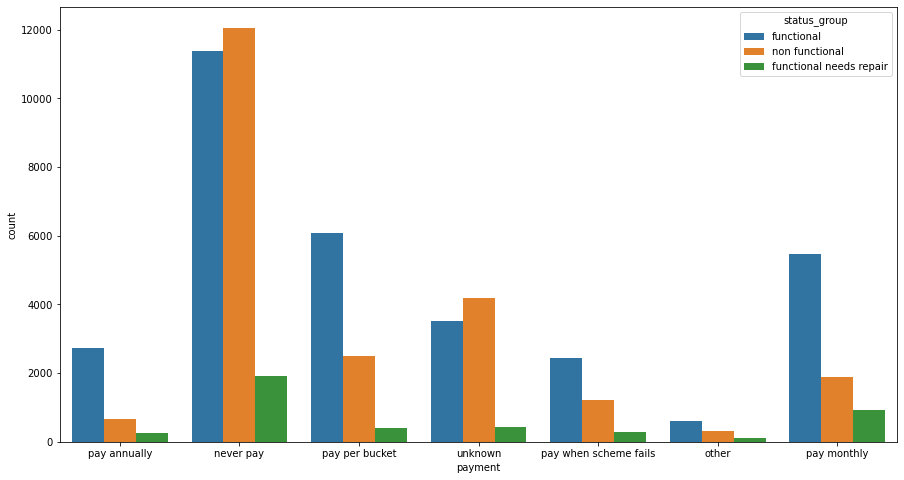

In [1025]:
count_plot("payment")

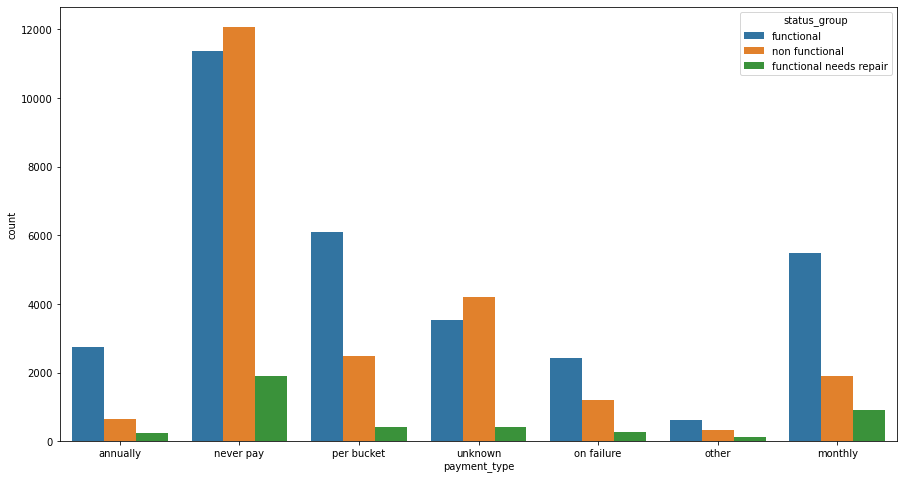

In [1026]:
count_plot("payment_type")


In [1027]:
df["water_quality"].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [1028]:
df["quality_group"].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

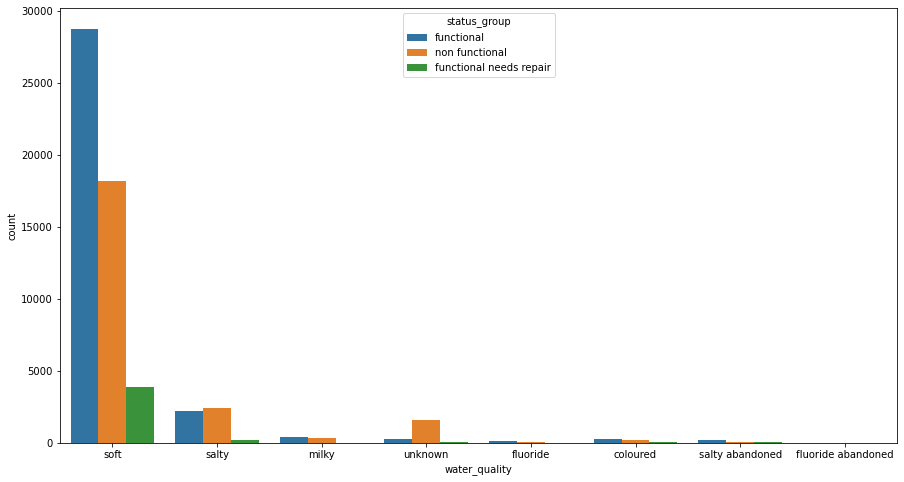

In [1029]:
count_plot("water_quality")

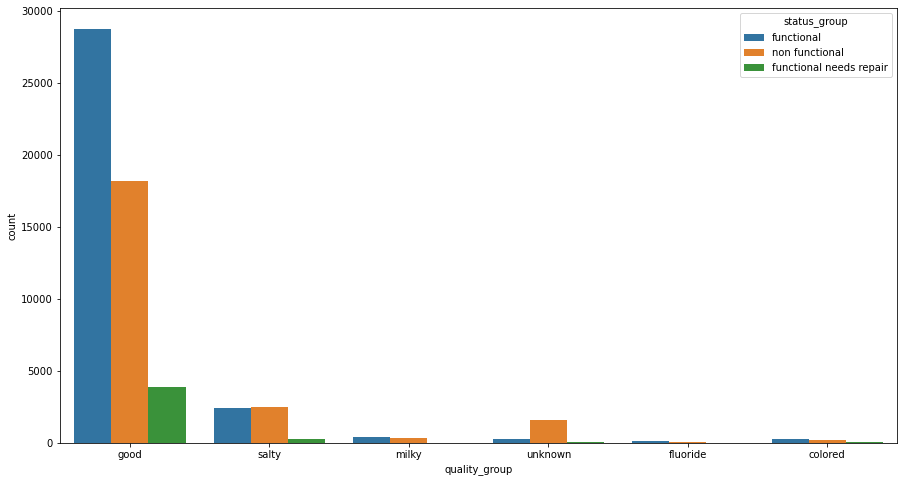

In [1030]:
count_plot("quality_group")

In [1031]:
df["source"].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [1032]:
df["source_type"].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [1096]:
df["installer"].value_counts()

DWE                         17402
Government                   1825
RWE                          1206
Commu                        1060
DANIDA                       1050
                            ...  
Sumry                           1
Institutional                   1
UAACC                           1
Kibo potry                      1
Village local contractor        1
Name: installer, Length: 2145, dtype: int64

In [1105]:
df.groupby(["installer","status_group"]).count().sort_values(ascending=False)

TypeError: sort_values() missing 1 required positional argument: 'by'

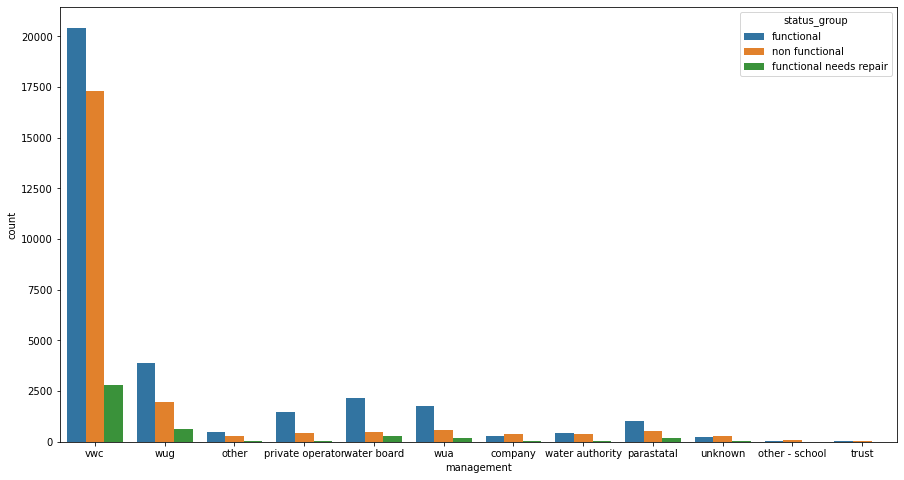

In [1111]:
count_plot("management")

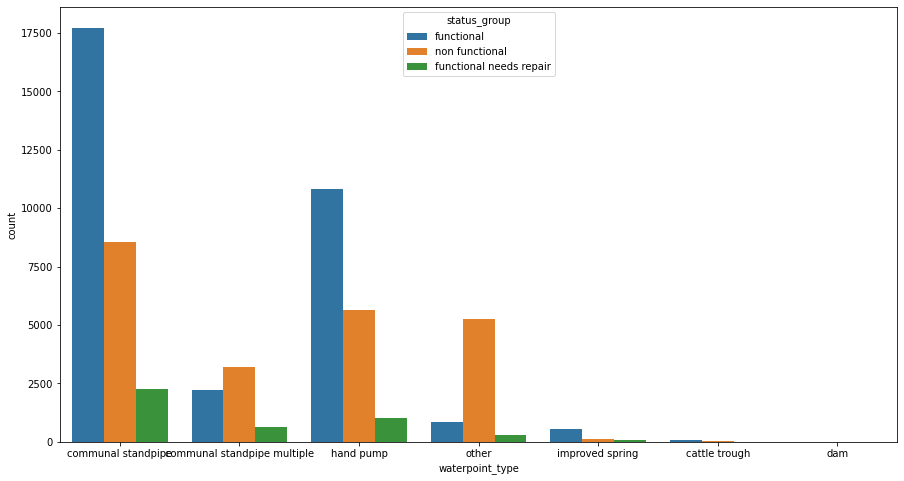

In [1095]:
count_plot("waterpoint_type")

In [ ]:
count_plot("source")

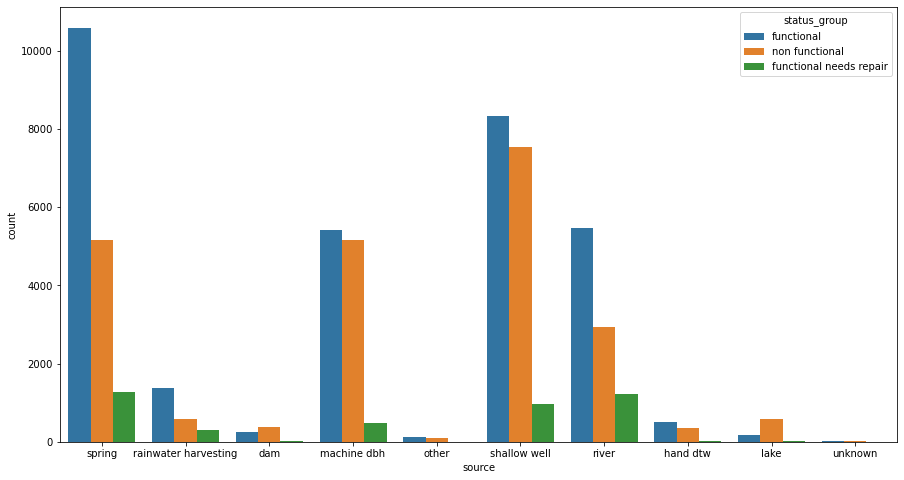

In [1034]:
count_plot("source")

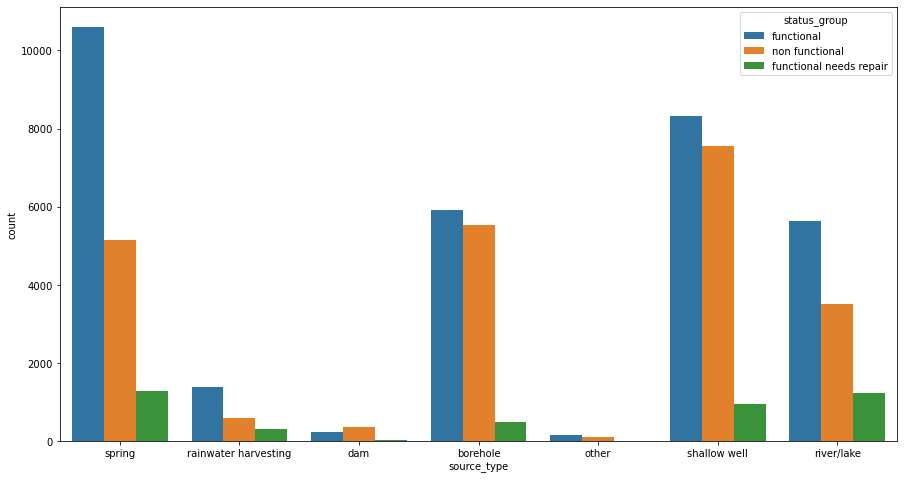

In [1035]:
count_plot("source_type")

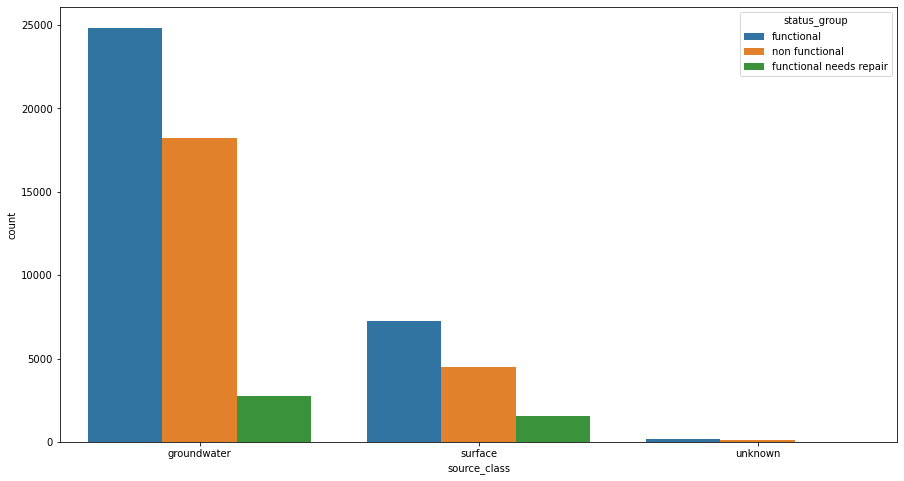

In [1036]:
count_plot("source_class")

In [1037]:
df["quantity"].value_counts() 

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [1038]:
df["quantity_group"].value_counts() 

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [1039]:
df["payment"].isna().sum()

0

In [1040]:
df["payment_type"].isna().sum()

0

In [1041]:
df["water_quality"].isna().sum()

0

In [1042]:
df["quality_group"].isna().sum()

0

In [1043]:
df["quantity"].isna().sum()

0

In [1044]:
df["quantity_group"].isna().sum()

0

In [1045]:
df["source"].isna().sum()

0

In [1046]:
df["source_type"].isna().sum()

0

In [1047]:
df["source_class"].isna().sum()

0

In [1048]:
df= df.drop(["amount_tsh", "num_private","date_recorded","longitude", "latitude","waterpoint_type_group", "subvillage", "region" , "lga", "ward", "recorded_by", "scheme_management","scheme_name", "extraction_type",
            "extraction_type_group","management_group", "payment", "water_quality","quantity_group", "source_type"], axis=1)

In [1049]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   funder                 55765 non-null  object
 1   gps_height             59400 non-null  int64 
 2   installer              55745 non-null  object
 3   wpt_name               59400 non-null  object
 4   basin                  59400 non-null  object
 5   region_code            59400 non-null  int64 
 6   district_code          59400 non-null  int64 
 7   population             59400 non-null  int64 
 8   public_meeting         56066 non-null  object
 9   permit                 56344 non-null  object
 10  construction_year      59400 non-null  int64 
 11  extraction_type_class  59400 non-null  object
 12  management             59400 non-null  object
 13  payment_type           59400 non-null  object
 14  quality_group          59400 non-null  object
 15  quantity           

def int_to_object(df):
    df["region_code"] = df["region_code"].astype(object)
    df["district_code"] = df["district_code"].astype(object)
    return df.dtypes

int_to_object(df)

In [1050]:
df['construction_year'] = df['construction_year'].replace(0, (df['construction_year'].median()))

In [1051]:
df['construction_year_bins'] = pd.cut(x=df['construction_year'], bins=[1960, 1970, 1980, 1990, 2000, 2010, 2013])

In [1052]:
df.dtypes

funder                      object
gps_height                   int64
installer                   object
wpt_name                    object
basin                       object
region_code                  int64
district_code                int64
population                   int64
public_meeting              object
permit                      object
construction_year            int64
extraction_type_class       object
management                  object
payment_type                object
quality_group               object
quantity                    object
source                      object
source_class                object
waterpoint_type             object
status_group                object
construction_year_bins    category
dtype: object

In [1053]:
df

,funder,gps_height,installer,wpt_name,basin,region_code,district_code,population,public_meeting,permit,...,extraction_type_class,management,payment_type,quality_group,quantity,source,source_class,waterpoint_type,status_group,construction_year_bins
0,Roman,1390,Roman,none,Lake Nyasa,11,5,109,True,False,...,gravity,vwc,annually,good,enough,spring,groundwater,communal standpipe,functional,"(1990, 2000]"
1,Grumeti,1399,GRUMETI,Zahanati,Lake Victoria,20,2,280,NaN,True,...,gravity,wug,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional,"(2000, 2010]"
2,Lottery Club,686,World vision,Kwa Mahundi,Pangani,21,4,250,True,True,...,gravity,vwc,per bucket,good,enough,dam,surface,communal standpipe multiple,functional,"(2000, 2010]"
3,Unicef,263,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,90,63,58,True,True,...,submersible,vwc,never pay,good,dry,machine dbh,groundwater,communal standpipe multiple,non functional,"(1980, 1990]"
4,Action In A,0,Artisan,Shuleni,Lake Victoria,18,1,0,True,True,...,gravity,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,functional,"(1980, 1990]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,Germany Republi,1210,CES,Area Three Namba 27,Pangani,3,5,125,True,True,...,gravity,water board,per bucket,good,enough,spring,groundwater,communal standpipe,functional,"(1990, 2000]"
59396,Cefa-njombe,1212,Cefa,Kwa Yahona Kuvala,Rufiji,11,4,56,True,True,...,gravity,vwc,annually,good,enough,river,surface,communal standpipe,functional,"(1990, 2000]"
59397,NaN,0,NaN,Mashine,Rufiji,12,7,0,True,False,...,handpump,vwc,monthly,fluoride,enough,machine dbh,groundwater,hand pump,functional,"(1980, 1990]"
59398,Malec,0,Musa,Mshoro,Rufiji,1,4,0,True,True,...,handpump,vwc,never pay,good,insufficient,shallow well,groundwater,hand pump,functional,"(1980, 1990]"


In [1054]:
pd.options.display.max_rows = 100

In [1055]:
pd.DataFrame(df.groupby("funder")["installer"].value_counts().sort_values(ascending=False)).head(20)

installer
funder                 installer                    
Government Of Tanzania DWE                      4254
                       Government               1607
Hesawa                 DWE                      1296
Danida                 DANIDA                   1046
Rwssp                  DWE                       914
Kkkt                   KKKT                      894
0                      0                         777
Dhv                    DWE                       678
Government Of Tanzania RWE                       645
Danida                 DWE                       626
Dwsp                   DWE                       616
Germany Republi        CES                       610
Unicef                 DWE                       562
Danida                 DANID                     551
Tcrs                   TCRS                      536
Hesawa                 HESAWA                    534
Danida                 Central government        509
Netherlands            DWE                       463
Dwe                    DWE                       450
Hifab                  Hesawa                    444

In [1056]:
df.funder.fillna("other", inplace=True)

In [1057]:
df["funder"].value_counts().sort_values(ascending=False).iloc[:6]

Government Of Tanzania    9084
other                     3635
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Name: funder, dtype: int64

In [1058]:
def top_5(col):
    top_funders = df[col].value_counts().sort_values(ascending=False)[:5]
    df[col] = df.loc[:, col].map(lambda x: 'other' if x not in top_funders else x)
    return df[col].value_counts()

In [1059]:
def bool_transf(col):
    df[col] = df[col].map({True : "1" , False  :"0"})
    return df[col].value_counts()

In [1060]:
bool_transf("public_meeting")

1    51011
0     5055
Name: public_meeting, dtype: int64

In [1061]:
bool_transf("permit")

1    38852
0    17492
Name: permit, dtype: int64

In [1062]:
top_5("funder")

other                     43626
Government Of Tanzania     9084
Danida                     3114
Hesawa                     2202
Rwssp                      1374
Name: funder, dtype: int64

In [1063]:
top_5("installer")

other         36857
DWE           17402
Government     1825
RWE            1206
Commu          1060
DANIDA         1050
Name: installer, dtype: int64

In [1064]:
df["wpt_name"].value_counts()

none                     3563
Shuleni                  1748
Zahanati                  830
Msikitini                 535
Kanisani                  323
                         ... 
Kwa Kasabarae/Jackson       1
Festo Sikale                1
Kwa Mzee Mwafungo           1
Kwa Benjamin Ngonyani       1
Sabayi Mro                  1
Name: wpt_name, Length: 37400, dtype: int64

In [1065]:
top_5("wpt_name")

other        52401
none          3563
Shuleni       1748
Zahanati       830
Msikitini      535
Kanisani       323
Name: wpt_name, dtype: int64

In [1066]:
df

,funder,gps_height,installer,wpt_name,basin,region_code,district_code,population,public_meeting,permit,...,extraction_type_class,management,payment_type,quality_group,quantity,source,source_class,waterpoint_type,status_group,construction_year_bins
0,other,1390,other,none,Lake Nyasa,11,5,109,1,0,...,gravity,vwc,annually,good,enough,spring,groundwater,communal standpipe,functional,"(1990, 2000]"
1,other,1399,other,Zahanati,Lake Victoria,20,2,280,NaN,1,...,gravity,wug,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional,"(2000, 2010]"
2,other,686,other,other,Pangani,21,4,250,1,1,...,gravity,vwc,per bucket,good,enough,dam,surface,communal standpipe multiple,functional,"(2000, 2010]"
3,other,263,other,other,Ruvuma / Southern Coast,90,63,58,1,1,...,submersible,vwc,never pay,good,dry,machine dbh,groundwater,communal standpipe multiple,non functional,"(1980, 1990]"
4,other,0,other,Shuleni,Lake Victoria,18,1,0,1,1,...,gravity,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,functional,"(1980, 1990]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,other,1210,other,other,Pangani,3,5,125,1,1,...,gravity,water board,per bucket,good,enough,spring,groundwater,communal standpipe,functional,"(1990, 2000]"
59396,other,1212,other,other,Rufiji,11,4,56,1,1,...,gravity,vwc,annually,good,enough,river,surface,communal standpipe,functional,"(1990, 2000]"
59397,other,0,other,other,Rufiji,12,7,0,1,0,...,handpump,vwc,monthly,fluoride,enough,machine dbh,groundwater,hand pump,functional,"(1980, 1990]"
59398,other,0,other,other,Rufiji,1,4,0,1,1,...,handpump,vwc,never pay,good,insufficient,shallow well,groundwater,hand pump,functional,"(1980, 1990]"


In [1067]:
df.drop("construction_year", axis=1, inplace=True)

In [1068]:
def int_to_object(df):
    df["region_code"] = df["region_code"].astype(object)
    df["district_code"] = df["district_code"].astype(object)
    df["construction_year_bins"] = df["construction_year_bins"].astype(object)
    return df.dtypes

In [1069]:
df["wpt_name"].value_counts()

other        52401
none          3563
Shuleni       1748
Zahanati       830
Msikitini      535
Kanisani       323
Name: wpt_name, dtype: int64

In [1075]:
df.isna().sum()

funder                       0
gps_height                   0
installer                    0
wpt_name                     0
basin                        0
region_code                  0
district_code                0
population                   0
public_meeting            3334
permit                    3056
extraction_type_class        0
management                   0
payment_type                 0
quality_group                0
quantity                     0
source                       0
source_class                 0
waterpoint_type              0
status_group                 0
construction_year_bins     102
dtype: int64

In [1088]:
df.corr()

,gps_height,region_code,district_code,population
gps_height,1.000000,-0.183521,-0.171233,0.135003
region_code,-0.183521,1.000000,0.678602,0.094088
district_code,-0.171233,0.678602,1.000000,0.061831
population,0.135003,0.094088,0.061831,1.000000


In [1070]:
df.to_csv("data/data_clean.csv")